In [1]:
import numpy as np
import xarray as xr
import os.path as op
import xgcm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ddir = '/rigel/ocp/users/tu2140/MITgcm/1D_Southern-Ocean/runs/noRelax_aboveHeu/'
subdir = 'SANT_20years_20171022_0001'

In [40]:
ds_grid = xr.open_dataset(op.join(ddir, subdir, 'grid.t001.nc'))
ds_grid['Z'].attrs['axis']='z'
ds_grid['Zl'].attrs['axis']='z'
ds_grid['Zl'].attrs['c_grid_axis_shift'] = -.5
ds_grid['Zu'].attrs['axis']='z'
ds_grid['Zu'].attrs['c_grid_axis_shift'] = .5
ds_grid

<xarray.Dataset>
Dimensions:  (X: 1, Xp1: 2, Y: 1, Yp1: 2, Z: 77, Zl: 77, Zp1: 78, Zu: 77)
Coordinates:
  * Z        (Z) float64 -5.0 -15.0 -25.0 -35.0 -45.0 -55.0 -65.0 -75.0 ...
  * Zp1      (Zp1) float64 0.0 -10.0 -20.0 -30.0 -40.0 -50.0 -60.0 -70.0 ...
  * Zu       (Zu) float64 -10.0 -20.0 -30.0 -40.0 -50.0 -60.0 -70.0 -80.0 ...
  * Zl       (Zl) float64 0.0 -10.0 -20.0 -30.0 -40.0 -50.0 -60.0 -70.0 ...
  * X        (X) float64 0.5
  * Y        (Y) float64 -44.5
  * Xp1      (Xp1) float64 0.0 1.0
  * Yp1      (Yp1) float64 -45.0 -44.0
Data variables:
    RC       (Z) float64 -5.0 -15.0 -25.0 -35.0 -45.0 -55.0 -65.0 -75.0 ...
    RF       (Zp1) float64 0.0 -10.0 -20.0 -30.0 -40.0 -50.0 -60.0 -70.0 ...
    RU       (Zu) float64 -10.0 -20.0 -30.0 -40.0 -50.0 -60.0 -70.0 -80.0 ...
    RL       (Zl) float64 0.0 -10.0 -20.0 -30.0 -40.0 -50.0 -60.0 -70.0 ...
    drC      (Z) float64 5.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 ...
    drF      (Z) float64 10.0 10.0 10.0 10.0 10.0 10.0

In [59]:
Z = ds_grid.Z
Zl = ds_grid.Zl

In [4]:
area = (ds_grid.rA * ds_grid.HFacC)[0,0]
area

<xarray.DataArray (Z: 77)>
array([  8.815971e+09,   8.815971e+09,   8.815971e+09,   8.815971e+09,
         8.815971e+09,   8.815971e+09,   8.815971e+09,   8.815971e+09,
         8.815971e+09,   8.815971e+09,   8.815971e+09,   8.815971e+09,
         8.815971e+09,   8.815971e+09,   8.815971e+09,   8.815971e+09,
         8.815971e+09,   8.815971e+09,   8.815971e+09,   8.815971e+09,
         8.815971e+09,   8.815971e+09,   8.815971e+09,   8.815971e+09,
         8.815971e+09,   8.815971e+09,   8.815971e+09,   8.815971e+09,
         8.815971e+09,   8.815971e+09,   8.815971e+09,   8.815971e+09,
         8.815971e+09,   8.815971e+09,   8.815971e+09,   8.815971e+09,
         8.815971e+09,   8.815971e+09,   8.815971e+09,   8.815971e+09,
         8.815971e+09,   8.815971e+09,   8.815971e+09,   8.815971e+09,
         8.815971e+09,   8.815971e+09,   8.815971e+09,   8.815971e+09,
         8.815971e+09,   8.815971e+09,   8.815971e+09,   8.815971e+09,
         8.815971e+09,   8.815971e+09,   8.815971e

In [41]:
grid = xgcm.Grid(ds_grid, periodic=False)
grid

<xgcm.Grid>
z Axis (not periodic):
  * center   Z (77) --> left
  * left     Zl (77) --> center
  * right    Zu (77) --> center

In [8]:
ds = xr.open_dataset(op.join(ddir, subdir, 'Fe_snap.0000000000.t001.nc')
                    ).isel(T=slice(450,900)).rename({'Zmd000077':'Z'}, inplace=True)
ds.coords['Z'] = ds_grid.Z
ds

<xarray.Dataset>
Dimensions:      (T: 450, X: 1, Y: 1, Z: 77)
Coordinates:
  * T            (T) float64 3.11e+08 3.117e+08 3.124e+08 3.131e+08 ...
  * X            (X) float64 0.5
  * Y            (Y) float64 -44.5
  * Z            (Z) float64 -5.0 -15.0 -25.0 -35.0 -45.0 -55.0 -65.0 -75.0 ...
Data variables:
    iter         (T) int32 86400 86592 86784 86976 87168 87360 87552 87744 ...
    diag_levels  (Z) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
    TRAC03       (T, Z, Y, X) float32 0.00010201 0.000101985 8.88242e-05 ...
    TRAC07       (T, Z, Y, X) float32 0.000126627 0.000126638 0.000133799 ...
    TRAC10       (T, Z, Y, X) float32 8.80176e-06 8.80518e-06 1.11403e-05 ...
    TRAC14       (T, Z, Y, X) float32 1.44385e-11 1.44401e-11 1.55165e-11 ...
    TRAC18       (T, Z, Y, X) float32 7.72247e-08 9.13863e-08 1.70299e-07 ...
Attributes:
    MITgcm_version:  checkpoint63n
    build_user:      tu2140
    build_host:      node216
    build_date:      Sun Oct 22 23:21:

In [9]:
FeT_snap = ds.TRAC03[:,:,0,0]
DOFe_snap = ds.TRAC07[:,:,0,0]
Z1Fe_snap = ds.TRAC10[:,:,0,0]
Z2Fe_snap = ds.TRAC14[:,:,0,0]
POFe_snap = ds.TRAC18[:,:,0,0]

In [10]:
dt = 8*24*3600.
dFeTdt = FeT_snap.diff(dim='T')/dt
dDOFedt = DOFe_snap.diff(dim='T')/dt
dZ1Fedt = Z1Fe_snap.diff(dim='T')/dt
dZ2Fedt = Z2Fe_snap.diff(dim='T')/dt
dPOFedt = POFe_snap.diff(dim='T')/dt

In [42]:
grid._ds

<xarray.Dataset>
Dimensions:  (X: 1, Xp1: 2, Y: 1, Yp1: 2, Z: 77, Zl: 77, Zp1: 78, Zu: 77)
Coordinates:
  * Z        (Z) float64 -5.0 -15.0 -25.0 -35.0 -45.0 -55.0 -65.0 -75.0 ...
  * Zp1      (Zp1) float64 0.0 -10.0 -20.0 -30.0 -40.0 -50.0 -60.0 -70.0 ...
  * Zu       (Zu) float64 -10.0 -20.0 -30.0 -40.0 -50.0 -60.0 -70.0 -80.0 ...
  * Zl       (Zl) float64 0.0 -10.0 -20.0 -30.0 -40.0 -50.0 -60.0 -70.0 ...
  * X        (X) float64 0.5
  * Y        (Y) float64 -44.5
  * Xp1      (Xp1) float64 0.0 1.0
  * Yp1      (Yp1) float64 -45.0 -44.0
Data variables:
    RC       (Z) float64 -5.0 -15.0 -25.0 -35.0 -45.0 -55.0 -65.0 -75.0 ...
    RF       (Zp1) float64 0.0 -10.0 -20.0 -30.0 -40.0 -50.0 -60.0 -70.0 ...
    RU       (Zu) float64 -10.0 -20.0 -30.0 -40.0 -50.0 -60.0 -70.0 -80.0 ...
    RL       (Zl) float64 0.0 -10.0 -20.0 -30.0 -40.0 -50.0 -60.0 -70.0 ...
    drC      (Z) float64 5.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 ...
    drF      (Z) float64 10.0 10.0 10.0 10.0 10.0 10.0

In [46]:
ds_grid.Zl

<xarray.DataArray 'Zl' (Zl: 77)>
array([    0.,   -10.,   -20.,   -30.,   -40.,   -50.,   -60.,   -70.,   -80.,
         -90.,  -100.,  -110.,  -120.,  -130.,  -140.,  -150.,  -160.,  -170.,
        -180.,  -190.,  -200.,  -210.,  -220.,  -230.,  -240.,  -250.,  -350.,
        -450.,  -550.,  -650.,  -750.,  -850.,  -950., -1050., -1150., -1250.,
       -1350., -1450., -1550., -1650., -1750., -1850., -1950., -2050., -2150.,
       -2250., -2350., -2450., -2550., -2650., -2750., -2850., -2950., -3050.,
       -3150., -3250., -3350., -3450., -3550., -3650., -3750., -3850., -3950.,
       -4050., -4150., -4250., -4350., -4450., -4550., -4650., -4750., -4850.,
       -4950., -5050., -5150., -5250., -5350.])
Coordinates:
  * Zl       (Zl) float64 0.0 -10.0 -20.0 -30.0 -40.0 -50.0 -60.0 -70.0 ...
Attributes:
    long_name:          vertical coordinate of upper cell interface
    units:              meters
    positive:           up
    axis:               z
    c_grid_axis_shift:  -0.5

In [73]:
kwargs = {'boundary':'fill'}

ds = xr.open_dataset(op.join(ddir, subdir, 'FeT_tave.0000000000.t001.nc')
                    ).isel(T=slice(450,900)).rename({'Zmd000077':'Z', 'Zld000077':'Zl'}, 
                                                    inplace=True)
ds.coords['Z'] = ds_grid.Z; ds.coords['Zl'] = ds_grid.Zl

FeT = ds.TRAC03[:,:,0,0]
ddfFeTdz = grid.diff(ds.DFrITr03[:,:,0,0],axis='z',**kwargs)/grid.diff(ds.Zl,axis='z',**kwargs)/area
ddfFeTdz

<xarray.DataArray (T: 450, Z: 77)>
array([[  8.449359e-13,   4.950704e-13,  -9.517501e-13, ...,  -2.582498e-17,
         -2.261400e-17,  -9.189517e-19],
       [  1.044874e-12,   4.601922e-13,  -1.008532e-12, ...,  -2.631069e-17,
         -2.324182e-17,  -9.399812e-19],
       [  1.690767e-12,   4.361033e-13,  -1.637456e-12, ...,  -2.677887e-17,
         -2.391007e-17,  -9.614153e-19],
       ..., 
       [  4.288727e-12,  -2.110432e-12,  -2.437506e-12, ...,  -1.732633e-17,
         -1.359476e-17,  -5.794387e-19],
       [  2.302565e-12,  -8.415438e-13,  -1.667393e-12, ...,  -1.715273e-17,
         -1.364948e-17,  -5.771963e-19],
       [  1.269017e-12,  -2.116591e-13,  -1.157755e-12, ...,  -1.696417e-17,
         -1.363147e-17,  -5.733160e-19]])
Coordinates:
  * T        (T) float64 3.117e+08 3.124e+08 3.131e+08 3.138e+08 3.145e+08 ...
  * Z        (Z) float64 -5.0 -15.0 -25.0 -35.0 -45.0 -55.0 -65.0 -75.0 ...
    X        float64 0.5
    Y        float64 -44.5

In [74]:
ds = xr.open_dataset(op.join(ddir, subdir, 'DOFe_tave.0000000000.t001.nc')
                    ).isel(T=slice(450,900)).rename({'Zmd000077':'Z', 'Zld000077':'Zl'}, 
                                                    inplace=True)
ds.coords['Z'] = ds_grid.Z; ds.coords['Zl'] = ds_grid.Zl
DOFe = ds.TRAC07[:,:,0,0]
ddfDOFedz = grid.diff(ds.DFrITr07[:,:,0,0],'z',**kwargs)/grid.diff(ds.Zl,'z',**kwargs)/area

ds = xr.open_dataset(op.join(ddir, subdir, 'ZOO1Fe_tave.0000000000.t001.nc')
                    ).isel(T=slice(450,900)).rename({'Zmd000077':'Z', 'Zld000077':'Zl'}, 
                                                    inplace=True)
ds.coords['Z'] = ds_grid.Z; ds.coords['Zl'] = ds_grid.Zl
Z1Fe = ds.TRAC10[:,:,0,0]
ddfZ1Fedz = grid.diff(ds.DFrITr10[:,:,0,0],'z',**kwargs)/grid.diff(ds.Zl,'z',**kwargs)/area

ds = xr.open_dataset(op.join(ddir, subdir, 'ZOO2Fe_tave.0000000000.t001.nc')
                    ).isel(T=slice(450,900)).rename({'Zmd000077':'Z', 'Zld000077':'Zl'}, 
                                                    inplace=True)
ds.coords['Z'] = ds_grid.Z; ds.coords['Zl'] = ds_grid.Zl 
Z2Fe = ds.TRAC14[:,:,0,0]
ddfZ2Fedz = grid.diff(ds.DFrITr14[:,:,0,0],'z',**kwargs)/grid.diff(ds.Zl,'z',**kwargs)/area

ds = xr.open_dataset(op.join(ddir, subdir, 'POFe_tave.0000000000.t001.nc')
                    ).isel(T=slice(450,900)).rename({'Zmd000077':'Z', 'Zld000077':'Zl'}, 
                                                    inplace=True)
ds.coords['Z'] = ds_grid.Z; ds.coords['Zl'] = ds_grid.Zl 
POFe = ds.TRAC18[:,:,0,0]
ddfPOFedz = grid.diff(ds.DFrITr18[:,:,0,0],'z',**kwargs)/grid.diff(ds.Zl,'z',**kwargs)/area

In [67]:
nz = 20

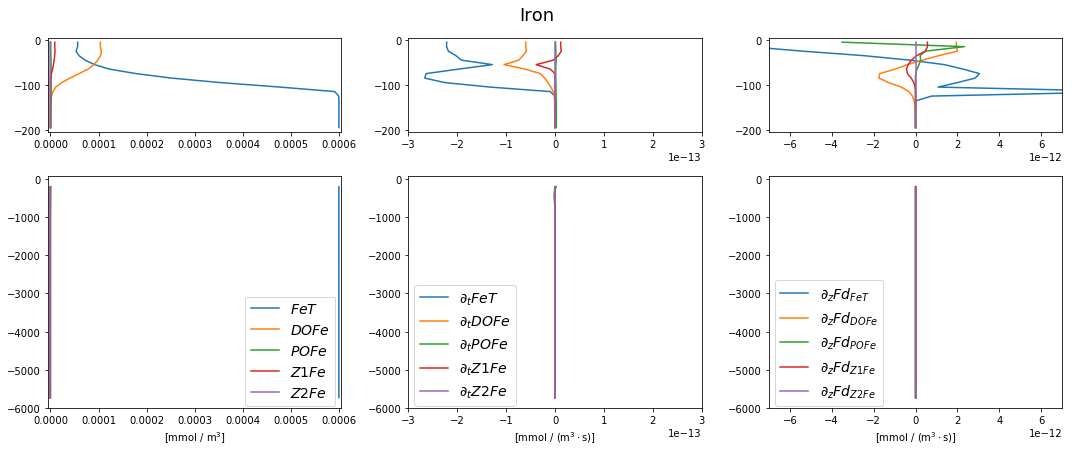

In [72]:
fig = plt.figure(figsize=(15,6))
ax1 = plt.subplot2grid((3,3), (0,0), rowspan=1)
ax2 = plt.subplot2grid((3,3), (1,0), rowspan=2)
ax3 = plt.subplot2grid((3,3), (0,1), rowspan=1)
ax4 = plt.subplot2grid((3,3), (1,1), rowspan=2)
ax5 = plt.subplot2grid((3,3), (0,2), rowspan=1)
ax6 = plt.subplot2grid((3,3), (1,2), rowspan=2)


ax1.plot(FeT.mean(dim='T')[:nz], Z[:nz])
ax1.plot(DOFe.mean(dim='T')[:nz], Z[:nz])
ax1.plot(POFe.mean(dim='T')[:nz], Z[:nz])
ax1.plot(Z1Fe.mean(dim='T')[:nz], Z[:nz])
ax1.plot(Z2Fe.mean(dim='T')[:nz], Z[:nz])

ax3.plot(dFeTdt.mean(dim='T')[:nz], Z[:nz])
ax3.plot(dDOFedt.mean(dim='T')[:nz], Z[:nz])
ax3.plot(dPOFedt.mean(dim='T')[:nz], Z[:nz])
ax3.plot(dZ1Fedt.mean(dim='T')[:nz], Z[:nz])
ax3.plot(dZ2Fedt.mean(dim='T')[:nz], Z[:nz])

ax5.plot(ddfFeTdz.mean(dim='T')[:nz], Z[:nz])
ax5.plot(ddfDOFedz.mean(dim='T')[:nz], Z[:nz])
ax5.plot(ddfPOFedz.mean(dim='T')[:nz], Z[:nz])
ax5.plot(ddfZ1Fedz.mean(dim='T')[:nz], Z[:nz])
ax5.plot(ddfZ2Fedz.mean(dim='T')[:nz], Z[:nz])


ax2.plot(FeT.mean(dim='T')[nz:], Z[nz:], label=r"$FeT$")
ax2.plot(DOFe.mean(dim='T')[nz:], Z[nz:], label=r"$DOFe$")
ax2.plot(POFe.mean(dim='T')[nz:], Z[nz:], label=r"$POFe$")
ax2.plot(Z1Fe.mean(dim='T')[nz:], Z[nz:], label=r"$Z1Fe$")
ax2.plot(Z2Fe.mean(dim='T')[nz:], Z[nz:], label=r"$Z2Fe$")

ax4.plot(dFeTdt.mean(dim='T')[nz:], Z[nz:], label=r"$\partial_t FeT$")
ax4.plot(dDOFedt.mean(dim='T')[nz:], Z[nz:], label=r"$\partial_t DOFe$")
ax4.plot(dPOFedt.mean(dim='T')[nz:], Z[nz:], label=r"$\partial_t POFe$")
ax4.plot(dZ1Fedt.mean(dim='T')[nz:], Z[nz:], label=r"$\partial_t Z1Fe$")
ax4.plot(dZ2Fedt.mean(dim='T')[nz:], Z[nz:], label=r"$\partial_t Z2Fe$")

ax6.plot(ddfFeTdz.mean(dim='T')[nz:], Z[nz:], label=r"$\partial_z {Fd_{FeT}}$")
ax6.plot(ddfDOFedz.mean(dim='T')[nz:], Z[nz:], label=r"$\partial_z {Fd_{DOFe}}$")
ax6.plot(ddfPOFedz.mean(dim='T')[nz:], Z[nz:], label=r"$\partial_z {Fd_{POFe}}$")
ax6.plot(ddfZ1Fedz.mean(dim='T')[nz:], Z[nz:], label=r"$\partial_z {Fd_{Z1Fe}}$")
ax6.plot(ddfZ2Fedz.mean(dim='T')[nz:], Z[nz:], label=r"$\partial_z {Fd_{Z2Fe}}$")

ax1.set_xlim([-5e-6, 6.05e-4])
ax2.set_xlim([-5e-6, 6.05e-4])
ax3.set_xlim([-3e-13, 3e-13])
ax4.set_xlim([-3e-13, 3e-13])
ax5.set_xlim([-7e-12, 7e-12])
ax6.set_xlim([-7e-12, 7e-12])
# ax6.set_xticks([-1e-12,-1e-13,0,1e-13,1e-12])
# ax6.set_xticklabels(['-1e-12','-1e-13','0','1e-13','1e-12'])
# ax5.set_xlim([-1e-4, 1e-4])
# ax6.set_xlim([-1e-4, 1e-4])

ax2.set_xlabel(r'[mmol / m$^3$]')
ax4.set_xlabel(r'[mmol / (m$^3 \cdot$s)]')
ax6.set_xlabel(r'[mmol / (m$^3 \cdot$s)]')

ax2.legend(bbox_to_anchor=(.98, .01), loc='lower right', borderaxespad=0., fontsize=14)
ax4.legend(bbox_to_anchor=(.02, .01), loc='lower left', borderaxespad=0., fontsize=14)
ax6.legend(bbox_to_anchor=(.02, .01), loc='lower left', borderaxespad=0., fontsize=14)
# ax6.legend(bbox_to_anchor=(.01, .01), loc='lower left', borderaxespad=0.)

# ax5.set_xscale('symlog', linthreshy=1e-14)
# ax6.set_xscale('symlog', linthreshy=1e-14)

fig.suptitle(r"Iron", y=1.04, fontsize=18)
plt.tight_layout()